# using my data from an excel file
## plot ols regression for beta

C:\Users\GODLEWSKI\AppData\Local\Temp\ipykernel_8096\2906435507.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1]
C:\Users\GODLEWSKI\AppData\Local\Temp\ipykernel_8096\2906435507.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha = model.params[0]


Beta of the stock: 0.8916195843105158
R-squared: 0.39829209421064315


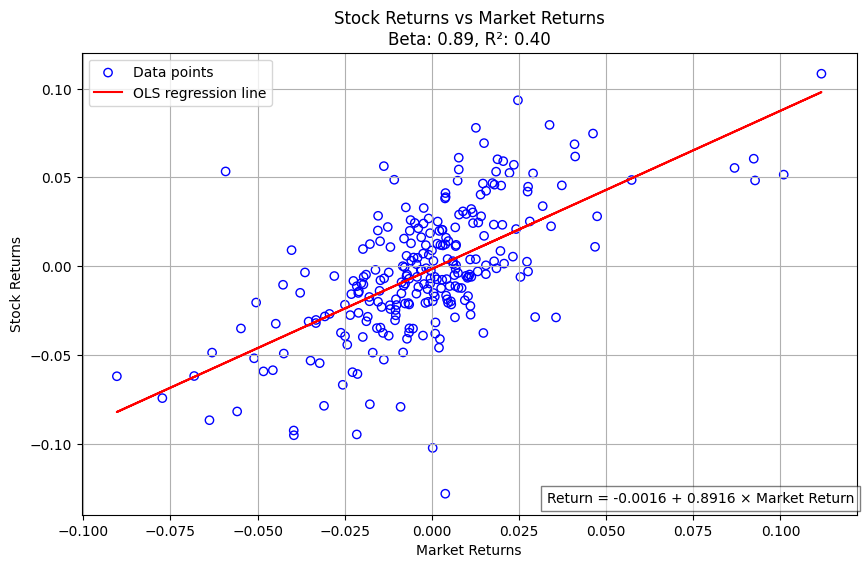

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# data needs 3 columns: Date, Adjusted price, Index value

# Load the dataset (replace the 'file_path' with the actual file path)
file_path = r'C:\Users\GODLEWSKI\Downloads\Classeur1.xlsx'
data = pd.read_excel(file_path, sheet_name='Feuil1')

# Set the 'Date' column as the index (if not already)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Calculate daily returns for both stock and market
data['Stock_Returns'] = data['Adjusted price'].pct_change()
data['Market_Returns'] = data['Index value'].pct_change()

# Drop any missing values that may result from the pct_change calculation
data.dropna(inplace=True)

# Define the independent variable (Market Returns) and dependent variable (Stock Returns)
market_returns = data['Market_Returns']
stock_returns = data['Stock_Returns']

# Add a constant to the independent variable (market_returns) for OLS regression
X = sm.add_constant(market_returns)

# Perform the OLS regression to calculate beta
model = sm.OLS(stock_returns, X).fit()

# Get the beta (slope of the regression line) and the R-squared value
beta = model.params[1]
alpha = model.params[0]
r_squared = model.rsquared
print(f'Beta of the stock: {beta}')
print(f'R-squared: {r_squared}')

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(market_returns, stock_returns, color='blue', edgecolors='blue', facecolors='none', marker='o', label='Data points')
plt.plot(market_returns, model.predict(X), color='red', label='OLS regression line')

# Add labels and title
plt.xlabel('Market Returns')
plt.ylabel('Stock Returns')
plt.title(f'Stock Returns vs Market Returns\nBeta: {beta:.2f}, R²: {r_squared:.2f}')

# Show the fitted equation on the plot
equation = f'Return = {alpha:.4f} + {beta:.4f} × Market Return'
plt.text(0.60, 0.05, equation, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

plt.legend()
plt.grid(True)

# Show the plot
plt.show()


## plot residuals from OLS reg

In [7]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import statsmodels.api as sm

# Load and preprocess data (same as before)
file_path = r'C:\Users\GODLEWSKI\Downloads\Classeur1.xlsx'
data = pd.read_excel(file_path, sheet_name='Feuil1')

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data['Stock_Returns'] = data['Adjusted price'].pct_change()
data['Market_Returns'] = data['Index value'].pct_change()
data.dropna(inplace=True)

market_returns = data['Market_Returns']
stock_returns = data['Stock_Returns']
X = sm.add_constant(market_returns)

# Perform OLS regression
model = sm.OLS(stock_returns, X).fit()
predicted_stock_returns = model.predict(X)
residuals = stock_returns - predicted_stock_returns

# Identify outliers (residuals above a threshold, e.g., absolute value > 2 std deviations)
threshold = 2 * residuals.std()
outliers = residuals.abs() > threshold

# Create a scatter plot of residuals vs market returns
residual_scatter = go.Scatter(
    x=market_returns, y=residuals,
    mode='markers',
    marker=dict(color='green'),
    name='Residuals',
    text=[f"Residual: {res:.4f}" for res in residuals],  # Tooltip text
    hovertemplate="<b>Market Return: %{x:.4f}</b><br>Residual: %{y:.4f}<extra></extra>"
)

# Highlight outliers with a different color
outlier_trace = go.Scatter(
    x=market_returns[outliers], y=residuals[outliers],
    mode='markers',
    marker=dict(color='red', size=10, symbol='x'),
    name='Outliers',
    text=[f"Residual: {res:.4f}" for res in residuals[outliers]],  # Tooltip text for outliers
    hovertemplate="<b>Market Return: %{x:.4f}</b><br>Residual: %{y:.4f}<extra></extra>"
)

# Create the figure
fig = go.Figure(data=[residual_scatter, outlier_trace])

# Add layout details
fig.update_layout(
    title="Residuals vs Market Returns",
    xaxis_title="Market Returns",
    yaxis_title="Residuals",
    width=1200,  # Set the width of the figure
    height=800,   # Set the height of the figure
    hovermode="closest",
    showlegend=True,
    template="plotly_white"
)

# Show the figure
fig.show()


# using yahoo finance data

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
C:\Users\GODLEWSKI\AppData\Local\Temp\ipykernel_23276\591476034.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1]
C:\Users\GODLEWSKI\AppData\Local\Temp\ipykernel_23276\591476034.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha = model.params[0]


Beta of the stock: 1.334145963694468
R-squared: 0.5143358063105674


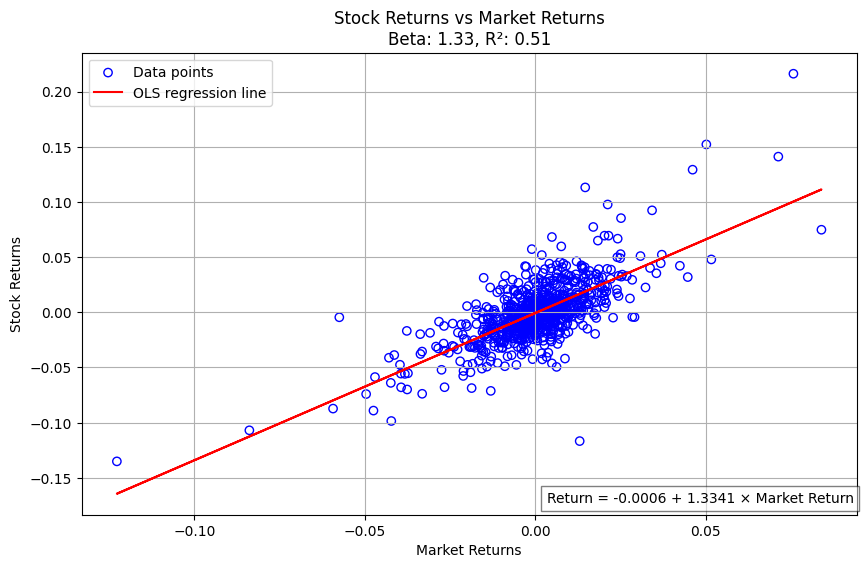

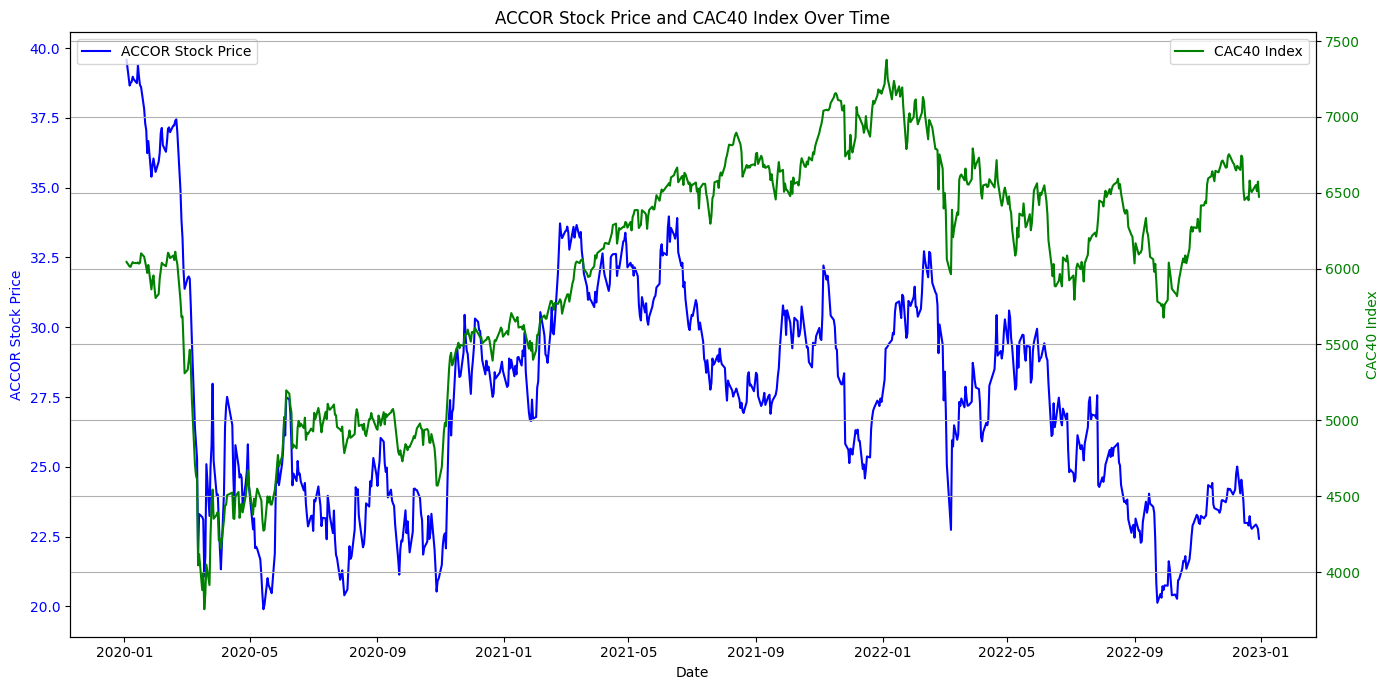

In [4]:
import yfinance as yf
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Define the tickers for ACCOR and CAC40
stock_ticker = 'AC.PA'
index_ticker = '^FCHI'

# Fetch historical data from Yahoo Finance
stock_data = yf.download(stock_ticker, start='2020-01-01', end='2023-01-01')
index_data = yf.download(index_ticker, start='2020-01-01', end='2023-01-01')

# Ensure both datasets have the same dates
data = pd.DataFrame({
    'Stock': stock_data['Adj Close'],
    'Index': index_data['Adj Close']
}).dropna()

# Calculate daily returns for both stock and market
data['Stock_Returns'] = data['Stock'].pct_change()
data['Market_Returns'] = data['Index'].pct_change()

# Drop any missing values that may result from the pct_change calculation
data.dropna(inplace=True)

# Define the independent variable (Market Returns) and dependent variable (Stock Returns)
market_returns = data['Market_Returns']
stock_returns = data['Stock_Returns']

# Add a constant to the independent variable (market_returns) for OLS regression
X = sm.add_constant(market_returns)

# Perform the OLS regression to calculate beta
model = sm.OLS(stock_returns, X).fit()

# Get the beta (slope of the regression line) and the R-squared value
beta = model.params[1]
alpha = model.params[0]
r_squared = model.rsquared
print(f'Beta of the stock: {beta}')
print(f'R-squared: {r_squared}')

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(market_returns, stock_returns, color='blue', edgecolors='blue', facecolors='none', marker='o', label='Data points')
plt.plot(market_returns, model.predict(X), color='red', label='OLS regression line')

# Add labels and title
plt.xlabel('Market Returns')
plt.ylabel('Stock Returns')
plt.title(f'Stock Returns vs Market Returns\nBeta: {beta:.2f}, R²: {r_squared:.2f}')

# Show the fitted equation on the plot
equation = f'Return = {alpha:.4f} + {beta:.4f} × Market Return'
plt.text(0.60, 0.05, equation, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Plot the stock price and the index on a figure with two y-axes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the stock price on the first y-axis
ax1.plot(data.index, data['Stock'], label='ACCOR Stock Price', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('ACCOR Stock Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for the index value
ax2 = ax1.twinx()
ax2.plot(data.index, data['Index'], label='CAC40 Index', color='green')
ax2.set_ylabel('CAC40 Index', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add a title and a legend
plt.title('ACCOR Stock Price and CAC40 Index Over Time')
fig.tight_layout()  # Adjust layout to make room for the y-axis labels

# Add legends for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.grid(True)
plt.show()

# Interactive Stock Beta Analysis and Visualization Using Yahoo Finance Data

Dropdown(description='Stock:', options={'ACCOR': 'AC.PA', 'Air Liquide': 'AI.PA', 'Airbus': 'AIR.PA', 'Arcelor…

Button(description='Perform Analysis', style=ButtonStyle())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
C:\Users\GODLEWSKI\AppData\Local\Temp\ipykernel_14364\1485193518.py:91: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1]
C:\Users\GODLEWSKI\AppData\Local\Temp\ipykernel_14364\1485193518.py:92: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha = model.params[0]


Beta of Capgemini: 1.027961385252861
R-squared: 0.5178210800551725


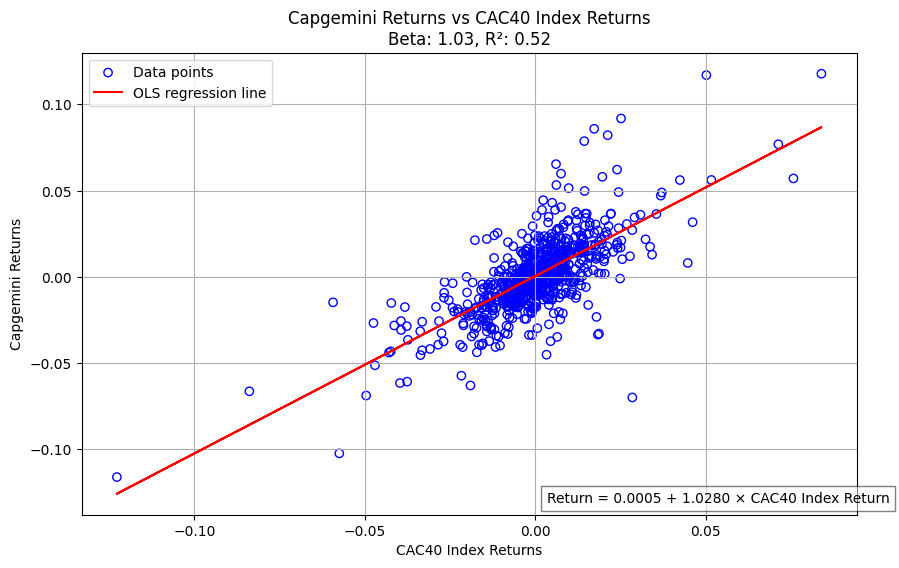

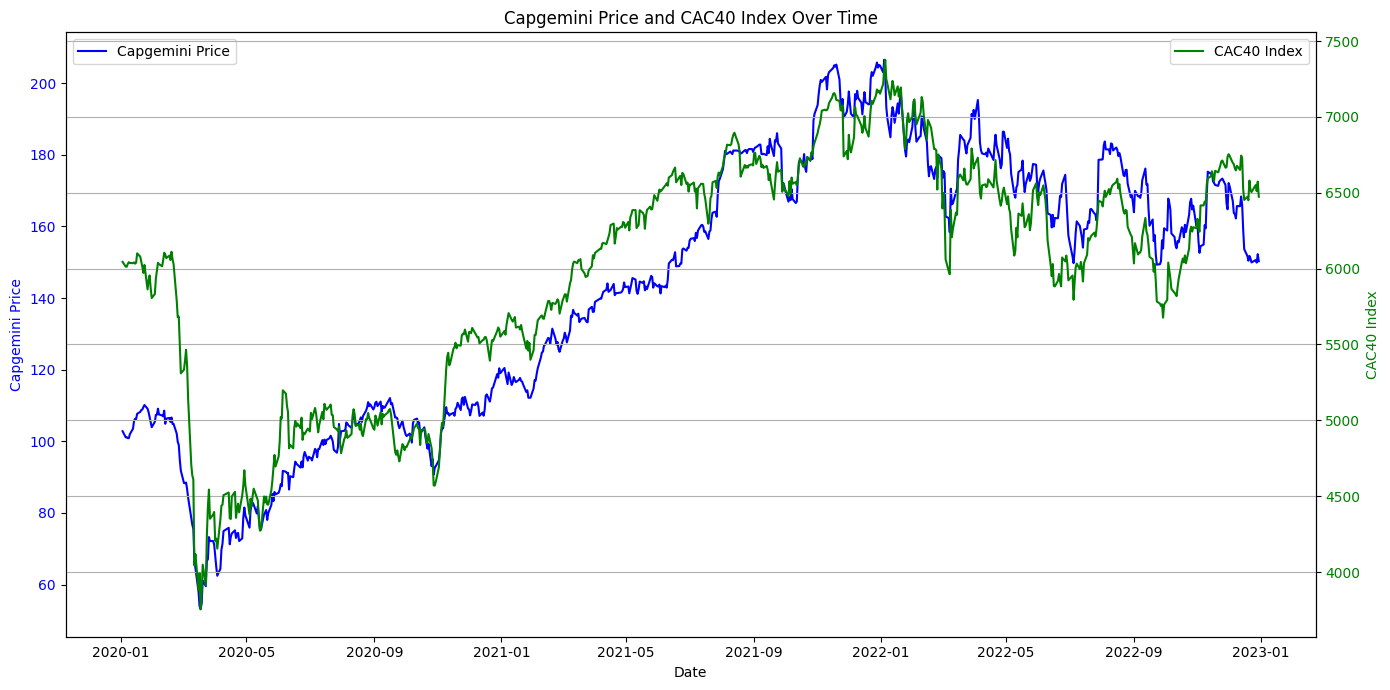

In [3]:
import yfinance as yf
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Define the tickers for CAC 40 components
cac40_components = {
    'ACCOR': 'AC.PA',
    'Air Liquide': 'AI.PA',
    'Airbus': 'AIR.PA',
    'ArcelorMittal': 'MT.PA',
    'AXA': 'CS.PA',
    'BNP Paribas': 'BNP.PA',
    'Bouygues': 'EN.PA',
    'Capgemini': 'CAP.PA',
    'Carrefour': 'CA.PA',
    'Crédit Agricole': 'ACA.PA',
    'Danone': 'BN.PA',
    'Dassault Systèmes': 'DSY.PA',
    'Engie': 'ENGI.PA',
    'EssilorLuxottica': 'EL.PA',
    'Hermès': 'RMS.PA',
    'Kering': 'KER.PA',
    'L\'Oréal': 'OR.PA',
    'Legrand': 'LR.PA',
    'LVMH': 'MC.PA',
    'Michelin': 'ML.PA',
    'Orange': 'ORA.PA',
    'Pernod Ricard': 'RI.PA',
    'Publicis': 'PUB.PA',
    'Renault': 'RNO.PA',
    'Safran': 'SAF.PA',
    'Saint-Gobain': 'SGO.PA',
    'Sanofi': 'SAN.PA',
    'Schneider Electric': 'SU.PA',
    'Société Générale': 'GLE.PA',
    'Stellantis': 'STLA.PA',
    'STMicroelectronics': 'STM.PA',
    'Thales': 'HO.PA',
    'TotalEnergies': 'TTE.PA',
    'Unibail-Rodamco-Westfield': 'URW.PA',
    'Veolia': 'VIE.PA',
    'Vinci': 'DG.PA',
    'Vivendi': 'VIV.PA'
}

# Create a dropdown menu for selecting the stock ticker
stock_dropdown = widgets.Dropdown(
    options=cac40_components,
    value='AC.PA',
    description='Stock:',
)

# Define the ticker for the CAC 40 index
index_ticker = '^FCHI'

# Function to perform the analysis
def perform_analysis(stock_ticker):
    stock_name = list(cac40_components.keys())[list(cac40_components.values()).index(stock_ticker)]
    
    # Fetch historical data from Yahoo Finance
    stock_data = yf.download(stock_ticker, start='2020-01-01', end='2023-01-01')
    index_data = yf.download(index_ticker, start='2020-01-01', end='2023-01-01')

    # Ensure both datasets have the same dates
    data = pd.DataFrame({
        'Stock': stock_data['Adj Close'],
        'Index': index_data['Adj Close']
    }).dropna()

    # Calculate daily returns for both stock and market
    data['Stock_Returns'] = data['Stock'].pct_change()
    data['Market_Returns'] = data['Index'].pct_change()

    # Drop any missing values that may result from the pct_change calculation
    data.dropna(inplace=True)

    # Define the independent variable (Market Returns) and dependent variable (Stock Returns)
    market_returns = data['Market_Returns']
    stock_returns = data['Stock_Returns']

    # Add a constant to the independent variable (market_returns) for OLS regression
    X = sm.add_constant(market_returns)

    # Perform the OLS regression to calculate beta
    model = sm.OLS(stock_returns, X).fit()

    # Get the beta (slope of the regression line) and the R-squared value
    beta = model.params[1]
    alpha = model.params[0]
    r_squared = model.rsquared
    print(f'Beta of {stock_name}: {beta}')
    print(f'R-squared: {r_squared}')

    # Plot the data and the regression line
    plt.figure(figsize=(10, 6))
    plt.scatter(market_returns, stock_returns, color='blue', edgecolors='blue', facecolors='none', marker='o', label='Data points')
    plt.plot(market_returns, model.predict(X), color='red', label='OLS regression line')

    # Add labels and title
    plt.xlabel('CAC40 Index Returns')
    plt.ylabel(f'{stock_name} Returns')
    plt.title(f'{stock_name} Returns vs CAC40 Index Returns\nBeta: {beta:.2f}, R²: {r_squared:.2f}')

    # Show the fitted equation on the plot
    equation = f'Return = {alpha:.4f} + {beta:.4f} × CAC40 Index Return'
    plt.text(0.60, 0.05, equation, transform=plt.gca().transAxes, fontsize=10,
             verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()

    # Plot the stock price and the index on a figure with two y-axes
    fig, ax1 = plt.subplots(figsize=(14, 7))

    # Plot the stock price on the first y-axis
    ax1.plot(data.index, data['Stock'], label=f'{stock_name} Price', color='blue')
    ax1.set_xlabel('Date')
    ax1.set_ylabel(f'{stock_name} Price', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Create a second y-axis for the index value
    ax2 = ax1.twinx()
    ax2.plot(data.index, data['Index'], label='CAC40 Index', color='green')
    ax2.set_ylabel('CAC40 Index', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    # Add a title and a legend
    plt.title(f'{stock_name} Price and CAC40 Index Over Time')
    fig.tight_layout()  # Adjust layout to make room for the y-axis labels

    # Add legends for both y-axes
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # Show the plot
    plt.grid(True)
    plt.show()

# Display the dropdown menu and button
display(stock_dropdown)

# Create a button to trigger the analysis
button = widgets.Button(description="Perform Analysis")
display(button)

# Define the button click event
def on_button_clicked(b):
    perform_analysis(stock_dropdown.value)

# Attach the button click event to the function
button.on_click(on_button_clicked)